In [165]:
##importing required libraries
import pandas as pd
import getpass
import sqlalchemy as sa
import numpy as np
import seaborn as sns
import matplotlib as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.feature_selection import RFE
pd.options.display.max_rows = 50

### Loading data set

In [131]:
it_salary=pd.read_csv('C:\\Users\\User\\Downloads\\IT_Salary_Survey_EU_2020_csv.csv')
it_salary.head()

,Age,Gender,City,Position,Total years of experience,Seniority level,Your main technology,Yearly brutto salary in EUR,Main language at work,Company size,Company type
0,66,Male,Munich,Software Engineer,40,Lead,Ruby,240000.0,German,51-100,Product
1,54,Male,Milano,Sales,31,Head,Network Automation,216000.0,English,Nov-50,Consulting
2,59,Male,Berlin,Backend Developer,30,Senior,Java,210000.0,German,101-1000,Product
3,45,Male,Berlin,Backend Developer,30,Senior,PHP,210000.0,English,Nov-50,Startup
4,51,Male,Berlin,Software Engineer,30,Senior,VB,200000.0,German,1000+,Consulting


### Checking basic info of data set

In [18]:
it_salary.describe()

,Age,Total years of experience,Yearly brutto salary in EUR
count,1990.000000,1990.000000,1990.000000
mean,32.274372,8.626131,72250.362377
std,5.279812,5.210204,23220.417838
min,20.000000,0.000000,20000.000000
25%,29.000000,5.000000,60000.000000
50%,32.000000,8.000000,70000.000000
75%,35.000000,12.000000,80000.000000
max,66.000000,40.000000,240000.000000


In [ ]:
###insert comment on the above

In [19]:
it_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1990 non-null   int64  
 1   Gender                       1990 non-null   object 
 2   City                         1990 non-null   object 
 3   Position                     1990 non-null   object 
 4   Total years of experience    1990 non-null   int64  
 5   Seniority level              1990 non-null   object 
 6   Your main technology         1985 non-null   object 
 7   Yearly brutto salary in EUR  1990 non-null   float64
 8   Main language at work        1990 non-null   object 
 9   Company size                 1990 non-null   object 
 10  Company type                 1990 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 171.1+ KB


In [20]:
it_salary.isnull().sum()

Age                            0
Gender                         0
City                           0
Position                       0
Total years of experience      0
Seniority level                0
Your main technology           5
Yearly brutto salary in EUR    0
Main language at work          0
Company size                   0
Company type                   0
dtype: int64

In [21]:
##Replacing null data
it_salary["Your main technology"].fillna("None", inplace = True)

In [22]:
it_salary.isnull().sum()

Age                            0
Gender                         0
City                           0
Position                       0
Total years of experience      0
Seniority level                0
Your main technology           0
Yearly brutto salary in EUR    0
Main language at work          0
Company size                   0
Company type                   0
dtype: int64

In [ ]:
##changing 'company size' to numerical in Tableau

### Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

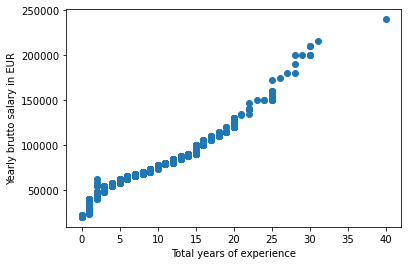

In [24]:
plt.scatter(it_salary["Total years of experience"],it_salary['Yearly brutto salary in EUR'])
plt.xlabel("Total years of experience")
plt.ylabel("Yearly brutto salary in EUR")
plt.show

In [25]:
### there is a linear relationship between the years of experience and yearly salary

<function matplotlib.pyplot.show(close=None, block=None)>

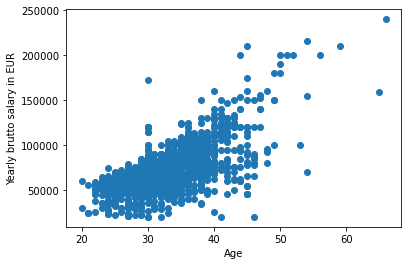

In [27]:
plt.scatter(it_salary["Age"],it_salary['Yearly brutto salary in EUR'])
plt.xlabel("Age")
plt.ylabel("Yearly brutto salary in EUR")
plt.show

In [29]:
###insert comment on plot above

<function matplotlib.pyplot.show(close=None, block=None)>

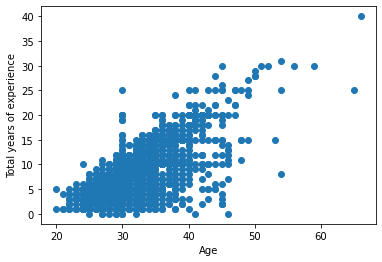

In [30]:
plt.scatter(it_salary["Age"],it_salary['Total years of experience'])
plt.xlabel("Age")
plt.ylabel("Total years of experience")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

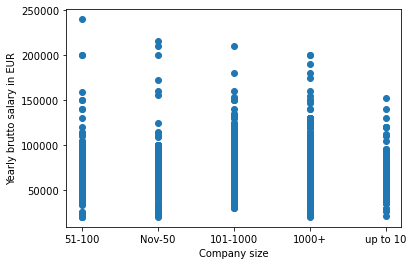

In [31]:
plt.scatter(it_salary["Company size"],it_salary["Yearly brutto salary in EUR"])
plt.xlabel("Company size")
plt.ylabel("Yearly brutto salary in EUR")
plt.show

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Total years of experience'}>],
       [<AxesSubplot:title={'center':'Yearly brutto salary in EUR'}>,
        <AxesSubplot:>]], dtype=object)

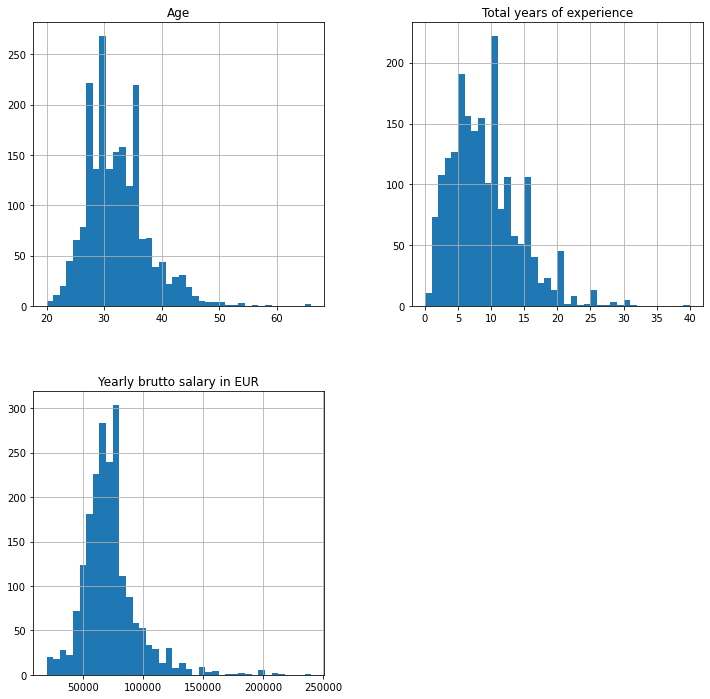

In [37]:
it_salary.select_dtypes(['int64','float']).hist(figsize=(12,12), bins=40)

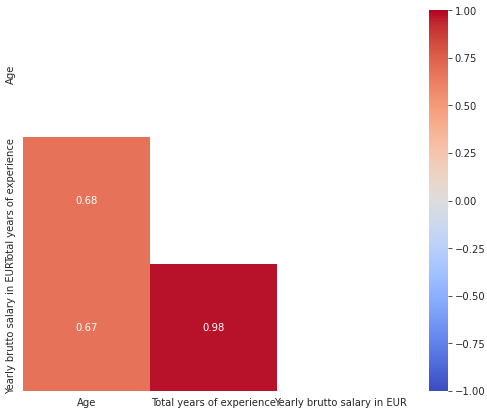

In [132]:
corr = it_salary.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

### Multiple Linear Regression

In [34]:
##Preparing data
X=it_salary[["Age,"Total years of experience"]]
X

,Age,Total years of experience
0,66,40
1,54,31
2,59,30
3,45,30
4,51,30
...,...,...
1985,46,0
1986,30,0
1987,41,0
1988,30,0


In [35]:
y=it_salary[["Yearly brutto salary in EUR"]]
y

,Yearly brutto salary in EUR
0,240000.0
1,216000.0
2,210000.0
3,210000.0
4,200000.0
...,...
1985,20000.0
1986,20000.0
1987,20000.0
1988,20000.0


In [36]:
X.shape, y.shape

((1990, 2), (1990, 1))

### Simple Linear Regression

In [50]:
##Defining X and y
X=it_salary[["Total years of experience"]]
y=it_salary[["Yearly brutto salary in EUR"]]

In [68]:
##split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [60]:
lr = LinearRegression().fit(X_train, y_train) ##fitting the model

In [69]:
R_sq = lr.score(X_train, y_train)  ##Getting results
print('coefficient of determination:', R_sq)
print('intercept:', lr.intercept_)
print('slope:', lr.coef_)

coefficient of determination: 0.9521833042949419
intercept: [34269.40615374]
slope: [[4407.79204679]]


In [ ]:
###this means that for every year of experience, the change in yearly salary is by about 95%

In [70]:
y_pred = lr.predict(X_test) ##Predicting target variable
print('predicted response:', y_pred, sep='\n')

predicted response:
[[ 73939.53457489]
 [ 51900.57434092]
 [ 87162.91071527]
 [ 65123.9504813 ]
 [ 65123.9504813 ]
 [ 69531.74252809]
 [ 60716.1584345 ]
 [ 56308.36638771]
 [ 78347.32662168]
 [ 47492.78229412]
 [ 87162.91071527]
 [ 87162.91071527]
 [ 38677.19820053]
 [ 60716.1584345 ]
 [ 43084.99024733]
 [ 65123.9504813 ]
 [109201.87094924]
 [ 73939.53457489]
 [ 51900.57434092]
 [ 51900.57434092]
 [ 87162.91071527]
 [ 38677.19820053]
 [ 82755.11866848]
 [ 51900.57434092]
 [ 91570.70276207]
 [ 56308.36638771]
 [ 95978.49480886]
 [ 82755.11866848]
 [ 73939.53457489]
 [ 65123.9504813 ]
 [ 82755.11866848]
 [ 69531.74252809]
 [ 60716.1584345 ]
 [ 47492.78229412]
 [ 56308.36638771]
 [ 47492.78229412]
 [122425.24708963]
 [ 51900.57434092]
 [ 60716.1584345 ]
 [ 82755.11866848]
 [ 69531.74252809]
 [ 78347.32662168]
 [ 56308.36638771]
 [ 56308.36638771]
 [ 87162.91071527]
 [ 56308.36638771]
 [ 95978.49480886]
 [109201.87094924]
 [122425.24708963]
 [113609.66299604]
 [ 69531.74252809]
 [122425.24

In [63]:
y_test

,Yearly brutto salary in EUR
887,70800.0
1670,54000.0
414,85000.0
1080,68000.0
1102,67000.0
...,...
1753,50000.0
907,70000.0
261,93000.0
1403,60000.0


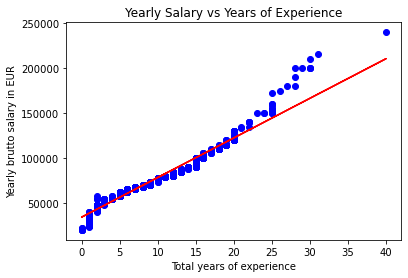

In [71]:
plt.scatter(X_train , y_train , color='blue')
plt.plot(X_train ,lr.predict(X_train),color='red')
plt.title('Yearly Salary vs Years of Experience')
plt.xlabel("Total years of experience")
plt.ylabel("Yearly brutto salary in EUR")
plt.show()

In [74]:
print(lr.score(X_test,y_test))

0.9504100124477952


### Multiple Linear Regression

In [97]:
X=it_salary[["Age","Total years of experience"]]##prepare data
y=it_salary[["Yearly brutto salary in EUR"]]


In [145]:
X=it_salary[["Age","Total years of experience"]]
X=pd.DataFrame(X)
X

,Age,Total years of experience
0,66,40
1,54,31
2,59,30
3,45,30
4,51,30
...,...,...
1985,46,0
1986,30,0
1987,41,0
1988,30,0


In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)##split data

In [152]:
mlr = LinearRegression().fit(X_train, y_train)##fitting the model

In [153]:
y_pred=mlr.predict(X_test)
print(y_pred)

[[ 60915.53973907]
 [ 60917.73527455]
 [ 69488.87515833]
 [112346.03826753]
 [ 52338.54509403]
 [ 78059.28319695]
 [ 39480.73750063]
 [ 43771.7962812 ]
 [ 56628.14018429]
 [142349.78485428]
 [ 43773.25997152]
 [ 78059.28319695]
 [ 56631.79941008]
 [ 65202.2074487 ]
 [ 48058.46399083]
 [ 56627.40833913]
 [ 65202.2074487 ]
 [ 86635.54599683]
 [ 78059.28319695]
 [103776.36207407]
 [ 43767.40521025]
 [ 65200.74375838]
 [ 78061.47873242]
 [ 48054.07291988]
 [ 82346.68275173]
 [ 78060.74688726]
 [ 73776.27471311]
 [ 69488.14331317]
 [ 65200.01191323]
 [ 78059.28319695]
 [ 65205.13482933]
 [ 99488.23067413]
 [ 65201.47560354]
 [ 48058.46399083]
 [ 86629.69123557]
 [ 56633.2631004 ]
 [ 52344.3998553 ]
 [ 73774.8110228 ]
 [ 99491.15805476]
 [ 78057.81950663]
 [138061.65345434]
 [ 60913.3442036 ]
 [ 60915.53973907]
 [142336.61164143]
 [ 78060.74688726]
 [ 78060.74688726]
 [ 82345.21906141]
 [ 65199.28006807]
 [103773.43469344]
 [ 65204.40298418]
 [ 78050.50105505]
 [ 99491.15805476]
 [120920.837

In [154]:
print(mlr.score(X_test,y_test))

0.9455744640497299


In [150]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3508.454036519147
Mean Squared Error: 32986224.41157153
Root Mean Squared Error: 5743.363510310968


In [137]:
rmse=mean_s
rmse = np.sqrt(mean_squared_error(y_test,pred))
r2 = r2_score(y_test,pred)

NameError: name 'mean_s' is not defined

In [151]:
lr = sm.OLS(y,X)
results = lr.fit()
print(results.summary())

                                     OLS Regression Results                                     
Dep. Variable:     Yearly brutto salary in EUR   R-squared (uncentered):                   0.992
Model:                                     OLS   Adj. R-squared (uncentered):              0.992
Method:                          Least Squares   F-statistic:                          1.211e+05
Date:                         Sun, 15 May 2022   Prob (F-statistic):                        0.00
Time:                                 21:16:21   Log-Likelihood:                         -20398.
No. Observations:                         1990   AIC:                                  4.080e+04
Df Residuals:                             1988   BIC:                                  4.081e+04
Df Model:                                    2                                                  
Covariance Type:                     nonrobust                                                  
                              

In [65]:
trans = PowerTransformer()
trans.fit(X_train) ##Transforming data

X_train = trans.transform(X_train)
X_test  = trans.transform(X_test)

X_train = pd.DataFrame(X_train, columns = X.columns)
X_test  = pd.DataFrame(X_test,  columns = X.columns)

In [ ]:
model.fit(X_train, y_train) ##modelling

y_pred_train_lm = model.predict(X_train)
y_pred_test_lm  = model.predict(X_test)

### Decision Tree Regression

In [111]:
it_salary=pd.read_csv('C:\\Users\\User\\Downloads\\IT_Salary_Survey_EU_2020_csv.csv')
it_salary.head()

,Age,Gender,City,Position,Total years of experience,Seniority level,Your main technology,Yearly brutto salary in EUR,Main language at work,Company size,Company type
0,66,Male,Munich,Software Engineer,40,Lead,Ruby,240000.0,German,51-100,Product
1,54,Male,Milano,Sales,31,Head,Network Automation,216000.0,English,Nov-50,Consulting
2,59,Male,Berlin,Backend Developer,30,Senior,Java,210000.0,German,101-1000,Product
3,45,Male,Berlin,Backend Developer,30,Senior,PHP,210000.0,English,Nov-50,Startup
4,51,Male,Berlin,Software Engineer,30,Senior,VB,200000.0,German,1000+,Consulting


In [ ]:
##binning company size(change categorical data to numerical data)


In [117]:
X=it_salary[["Age","Total years of experience"]]##prepare data
y=it_salary[["Yearly brutto salary in EUR"]]

In [112]:
X, y = it_salary(return_X_y=True)
print(X.shape)
print(y.shape)

TypeError: 'DataFrame' object is not callable

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

In [119]:
DTR_model = DecisionTreeRegressor(max_depth=3)

In [120]:
DTR_model.fit(X_train, y_train)


y_pred_train = DTR_model.predict(X_train)
y_pred_test  = DTR_model.predict(X_test)

In [121]:
ME_train = np.mean(y_train-y_pred_train)
ME_test  = np.mean(y_test-y_pred_test)

ValueError: Unable to coerce to Series, length must be 1: given 1393

In [ ]:
X=it_salary[["Age","Total years of experience"]]##prepare data
y=it_salary[["Yearly brutto salary in EUR"]

In [161]:
###One hot encoding
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)
gender=ohe.fit_transform(it_salary[['Gender']])
gender

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [162]:
ohe.categories_

[array(['Diverse', 'Female', 'Male'], dtype=object)]

In [163]:
ohe=OneHotEncoder(sparse=False)
city=ohe.fit_transform(it_salary[['City']])
city

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [164]:
ohe.categories_

[array(['Aachen', 'Almere', 'Amsterdam', 'Ansbach', 'Antwerpen',
        'Barcelona', 'Basel', 'Bayern', 'Berlin', 'Bern', 'Bielefeld',
        'Bodensee', 'Boeblingen', 'Bonn', 'Braunschweig', 'Bremen',
        'Brunswick', 'Brussels', 'Bölingen', 'Cambridge', 'City in Russia',
        'Cologne', 'Copenhagen', 'Cork', 'Cracovia', 'Cracow', 'Cupertino',
        'Darmstadt', 'Den Haag', 'Dortmund', 'Dresden', 'Dubai', 'Dublin',
        'Düsseldorf', 'Eindhoven', 'Fr', 'France', 'Frankfurt', 'Freiburg',
        'Friedrichshafen', 'Gdańsk', 'Gothenburg', 'Hamburg', 'Hannover',
        'Heidelberg', 'Heilbronn', 'Helsinki', 'Hildesheim', 'Hilversum',
        'Ingolstadt', 'Innsbruck', 'Istanbul', 'Jena', 'Jyvaskyla',
        'Kaiserslautern', 'Karlsruhe', 'Kassel', 'Kempten', 'Kiev',
        'Koblenz', 'Konstanz', 'Konstanz area', 'Krakow', 'Kyiv',
        'Lausanne', 'Leeuwarden', 'Leipzig', 'Limassol', 'Lingen',
        'Lisbon', 'London', 'Lugano', 'Luttich', 'Lübeck', 'Madrid',
       

In [166]:
col_trans=make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),['Gender','City']),
    remainder='passthrough')

In [167]:
it_sal=col_trans.fit_transform(X)

ValueError: A given column is not a column of the dataframe

### Random Forest